[View in Colaboratory](https://colab.research.google.com/github/PeterCha90/Pytorch-Deep-Learning/blob/master/Colab_intro.ipynb)

##### 이 포스팅은 Jaeyeon Baek님의 [블로그](http://jybaek.tistory.com/686), [최건호](https://github.com/GunhoChoi)님의 'Google Colaboratory 사용법'을 참조하여 만들었습니다. 


## Colab이란?
* Jupyter Notebook를 구글 드라이브에서 사용할 수 있는 것인데, 여태 있었던 구글 문서나 구글 스프레드시트처럼, 실시간 협업이 가능한 버전이라고 생각하면 된다고 합니다. 원래 구글 내부에서 직원들이 사용하던 것이라고 하네요! (그래서 에러가 나면 "SEARCH STACK OVERFLOW" 버튼이 생겨서 바로 검색할 수 있게 해주는 등의 기능이 있는 것 같습니다 :D)
* Jupyter Notebook나 다른 IDE에서 흔히 제공하는 Variable다음 `.`을 찍고, Tab키를 치면 하위요소(함수 or 변수)의 일부만 쳐도 나타나게 하는 기능도 조금 반응이 느리긴 하지만, 제 크롬에서는 0.5초 뒤에 나타납니다. :D 

##Linux 명령어 사용하기
* Colab.에서는 느낌표로 쓴 뒤에 명령어를 치면 bash나, terminal에서 작동하는 것으로 처리해줍니다. 로컬에서 귀찮게 창을 옮겨서 설치하고 다시 Jupyter로 돌아와야했던 과정이 매우 심플해졌습니다! 하지만, `cat sample.txt`같은 native Linux에서나 가능한 문법과 같은 특정 명령어들은 작동하지 않습니다. 
* 그래서, 100% Linux native 명령어를 쓸 수 있는 것은 아니며, 어디까지나 그때 그때, 필요한 library, package 설치 편의를 위한 수준이라고 볼 수 있을 것 같습니다.
* 리눅스 명령어에서 익숙한 분들은 당연히 경로 이동을 할때 `cd`를 쓸 텐데, `!cd`는 먹히지 않고, `os.chdir()`로 이동해야 합니다. 


* 빈 폴더를 하나 만들고 그 안에 짧은 txt파일을 만들고 확인해 봅시다

In [96]:
import os

!mkdir test
os.chdir('test')
!pwd
# 명령어는 못찾는다고 나오지만 생성은 합니다 :D
!'Sample text!' > sample.txt
! ls

/home/test
/bin/sh: 1: Sample text!: not found
sample.txt



## Colab.에서 쓸 수 있는 **GPU에 대한 정보**를 가져와 봅시다 :D 

* 일단 필요한 Util을 다운을 받고,


In [3]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/ff/24/c1/7e98d678e5be90c88cc151f1f3ef77a96ea3e8266b1aa225a4
Successfully built gputil


In [0]:
import psutil
import humanize
import os
import GPUtil as GPU

GPU는 하나만 허락해 줍니다만... (nn.DataParallel 써보고 싶었는데..)

갓글님은 그 하나는 에이스입니다. 무려 Tesla K80.



In [22]:
GPUs = GPU.getGPUs()
gpu = GPUs[0]

print(gpu.__dict__["name"])
print("The number of GPUs: {}".format(len(GPUs)))
print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil* 100, gpu.memoryTotal))

Tesla K80
The number of GPUs: 1
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB


## Pytorch 설치
* 구글이기 때문에 tensorflow는 이미 깔려있습니다. :D 

In [1]:
import tensorflow as tf
print(tf.__version__)

1.6.0


* Pytorch는 깔려 있지 않네요 :( 
* 그럼 어떻게 설치하면되는지 버튼만 누르면 친절히 명령어를 알려줍니다. 

In [18]:
import torch

ModuleNotFoundError: ignored

* INSTALL TORCH를 눌러서 나온 코드를 실행만 하면 설치가 완료됩니다. :) 
* 안타깝지만, Colab은 docker기반의 instance로 실행되기 때문에 한 번에 12시간까지만 사용할 수 있습니다.
* 그래서, 작업 하시던 Colab을 껏다가 잠시 후 다시 시작하면 새로운 docker container를 받기 때문에 새로운 인스턴스 위에서 시작할 때마다 pytorch는 매번 다시 깔아야 합니다 ^^;

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
import torch

* 그 다음 부터는 Jupyter notebook을 사용하듯 사용하시면 될 것 같습니다 :)

## Local file Upload! 

* Local가지고 있는 CIFAR10 png data로 로컬 파일 업로드를 테스트 해봤습니다. 
* 로컬에서 files를 통해서 가져오는 데이터들은 기본적으로 dictionary 형태입니다. 
* 이 업로드한 데이터들도 새로운 인스턴스에서 돌아가면 당연히 없어지니 참고하세요 :) 

In [82]:
from google.colab import files

cifar10 = files.upload()

Saving 00000.png to 00000.png
Saving 00001.png to 00001.png
Saving 00002.png to 00002.png
Saving 00003.png to 00003.png
Saving 00004.png to 00004.png
Saving 00005.png to 00005.png
Saving 00006.png to 00006.png
Saving 00007.png to 00007.png
Saving 00008.png to 00008.png
Saving 00009.png to 00009.png


* 귀여운 개구리를 확인할 수 있습니다.

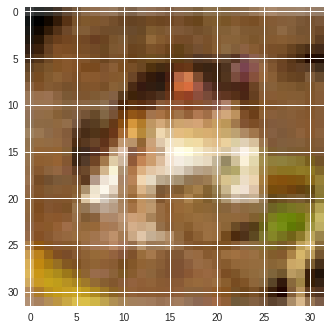

In [83]:
import matplotlib.pyplot as plt
import io

from PIL import Image

item = cifar10.get(list(cifar10.keys())[0])
image = Image.open(io.BytesIO(item))

plt.imshow(image)

* 사실 이렇게 이미지를 올리면 50000장이나 되는 Training 데이터가 다 올라가기만 기다리면 아마 못해서 1시간 이상은 걸릴 것 같다는 생각이 들어서, 로컬에 데이터가 너무 많을 경우는 개인 Google Drive에 업로드 한 다음, 그 directory 안에서 작업을 하면 되겠죠? 
* 그렇다면 작업하는 코드가 있는 Google Drive 자체를 Mount 하는 방법을 알아보도록 하겠습니다. :) 

## Mount your Google Drive

source from [DEEP LEARNING TURKEY](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)

* Google Drive는 한 번만 Mount하면 됩니다. 
* 아래 코드를 실행시키시면, 설치를 하다가 구글 계정 인증을 해달라는 링크가 나오는데, 거기서 verification code를 잘 복사하셔서 인증하시면 됩니다.  

In [86]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmpk5fw_f4u/pubring.gpg' created
gpg: /tmp/tmpk5fw_f4u/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


* "/home"으로 경로를 이동한 뒤에, drive라는 폴더를 만들어서 본인 계정의 구글 드라이브를 drive라는 폴더에 Mount합니다. 
* 이 과정을 거치면 개인 Google Drive에 있는 파일들이 이 폴더 안에 들어가게 됩니다. 
* 저의 경우, `Colab_Notebooks`라는 이름으로 폴더가 생성되어 있고, 그 폴더 안에 이 튜토리얼이 있습니다. 

In [98]:
os.chdir("/home")
!mkdir drive
!google-drive-ocamlfuse drive

os.chdir("/home/drive/Colab_Notebooks")
!ls

mkdir: cannot create directory ‘drive’: File exists
fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
CIFAR10_train  Colab_intro.ipynb


* Drag & Drop으로 제가 옮겼던 train폴더 안에 이미지들을 확인 할 수 있었습니다.

In [91]:
os.chdir('./CIFAR10_train')
!ls 

00000.png  00003.png  00006.png  00009.png  00012.png
00001.png  00004.png  00007.png  00010.png  00013.png
00002.png  00005.png  00008.png  00011.png  00014.png


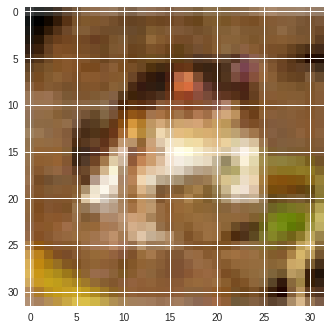

In [93]:
image = Image.open('00000.png')

plt.imshow(image)